# Loading & Analyse de base 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [2]:
data = pd.read_csv(r"data/train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
data.drop(columns="Id", inplace= True)

In [6]:
data.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [7]:
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [8]:
print(data["SalePrice"].isna().sum())

0


# Analyse de la variable target

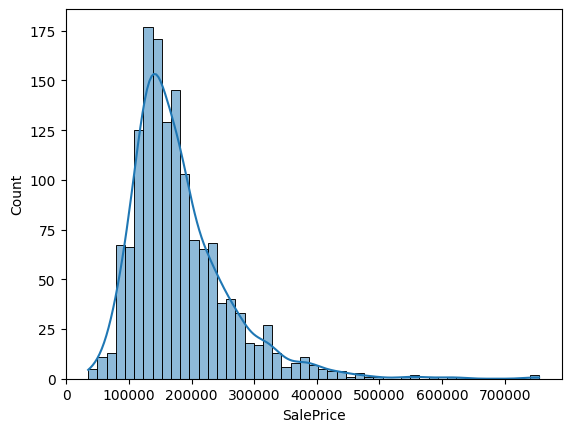

In [9]:
sns.histplot(data["SalePrice"], kde= True)
plt.show()


In [10]:

# We saw  in the above plot that the distribution is skewed and has outliers
# To better see the degree of skewness, it is better to calculate skewness and kurtosis 

print("Skewness : ", skew(data["SalePrice"]))
print("kurtosis : ", kurtosis(data['SalePrice']))

Skewness :  1.880940746034036
kurtosis :  6.509812011089439


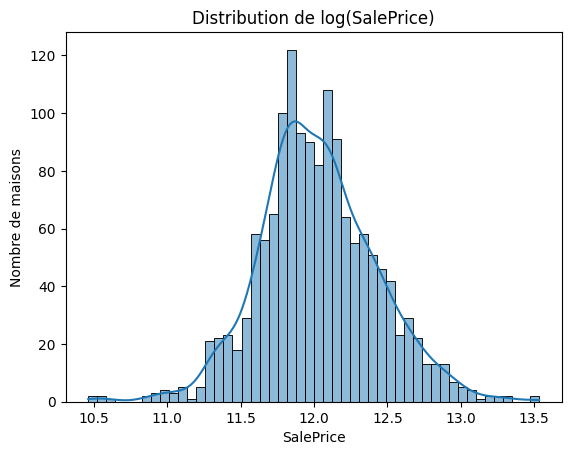

Skewness :  0.1212103673013655
kurtosis :  0.8026555069117713


In [11]:
# Now, as the data is skewed, it is better to log-transform

data["SalePrice_log"] = np.log(data["SalePrice"])

sns.histplot(data["SalePrice_log"], kde = True, bins = 50)
plt.title("Distribution de log(SalePrice)")
plt.xlabel("SalePrice")
plt.ylabel("Nombre de maisons")
plt.show()

print("Skewness : ", skew(data["SalePrice_log"]))
print("kurtosis : ",kurtosis(data["SalePrice_log"]))

We're now going to use SalePrice_Log as a target

In [12]:
numeric_data = data.select_dtypes(include=['float', 'int'])
categorical_data = data.select_dtypes(include=['object'])


In [13]:
numeric_cols = numeric_data.columns
missing_nums = data[numeric_cols].isnull().sum()
missing_nums = missing_nums[missing_nums>0]
missing_nums


LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [14]:
numeric_fill = {
    'LotFrontage' : data['LotFrontage'].median(),
    'MasVnrArea' : 0,
    'GarageYrBlt' : data['YearBuilt'].median()
}

for col, val in numeric_fill.items():
    data[col] = data[col].fillna(val)

missing_nums = data[numeric_cols].isnull().sum()
missing_nums = missing_nums[missing_nums>0]
missing_nums


Series([], dtype: int64)

In [15]:
categoricals_cols = categorical_data.columns
missing_cat = data[categoricals_cols].isnull().sum()
missing_cat = missing_cat[missing_cat>0]
missing_cat

Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [16]:
for col in categoricals_cols:
    if col == "Electrical":
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna("Missing")

In [17]:
na_counts = data.isna().sum()
na_cols = na_counts[na_counts > 0]

print(na_cols)

Series([], dtype: int64)


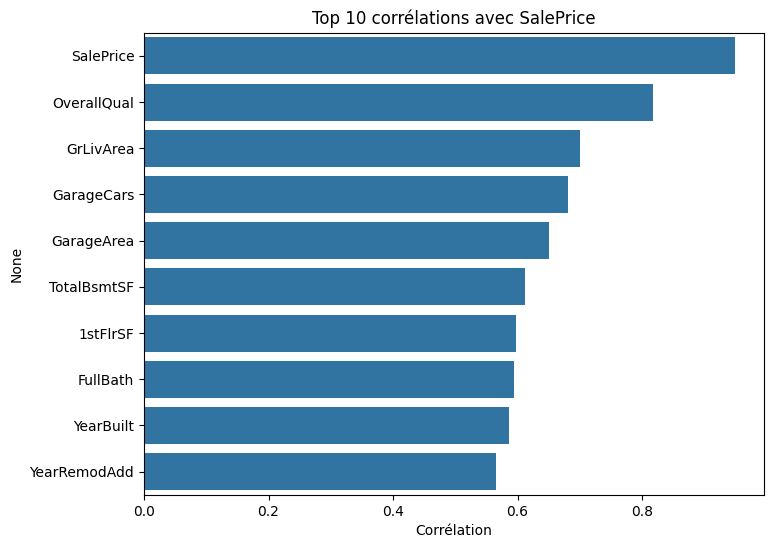

In [18]:
# Calculer la corrélation entre chaque feature numérique et SalePrice
corr = data.corr(numeric_only=True)
corr_target = corr["SalePrice_log"].sort_values(ascending=False)

# Visualiser les plus corrélées
import seaborn as sns
plt.figure(figsize=(8,6))
top_corr = corr_target[1:11]  # Les 10 plus corrélées (hors SalePrice lui-même)
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title("Top 10 corrélations avec SalePrice")
plt.xlabel("Corrélation")
plt.show()

In [19]:
top_corr = top_corr[1:6].index
top_corr

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF'], dtype='object')

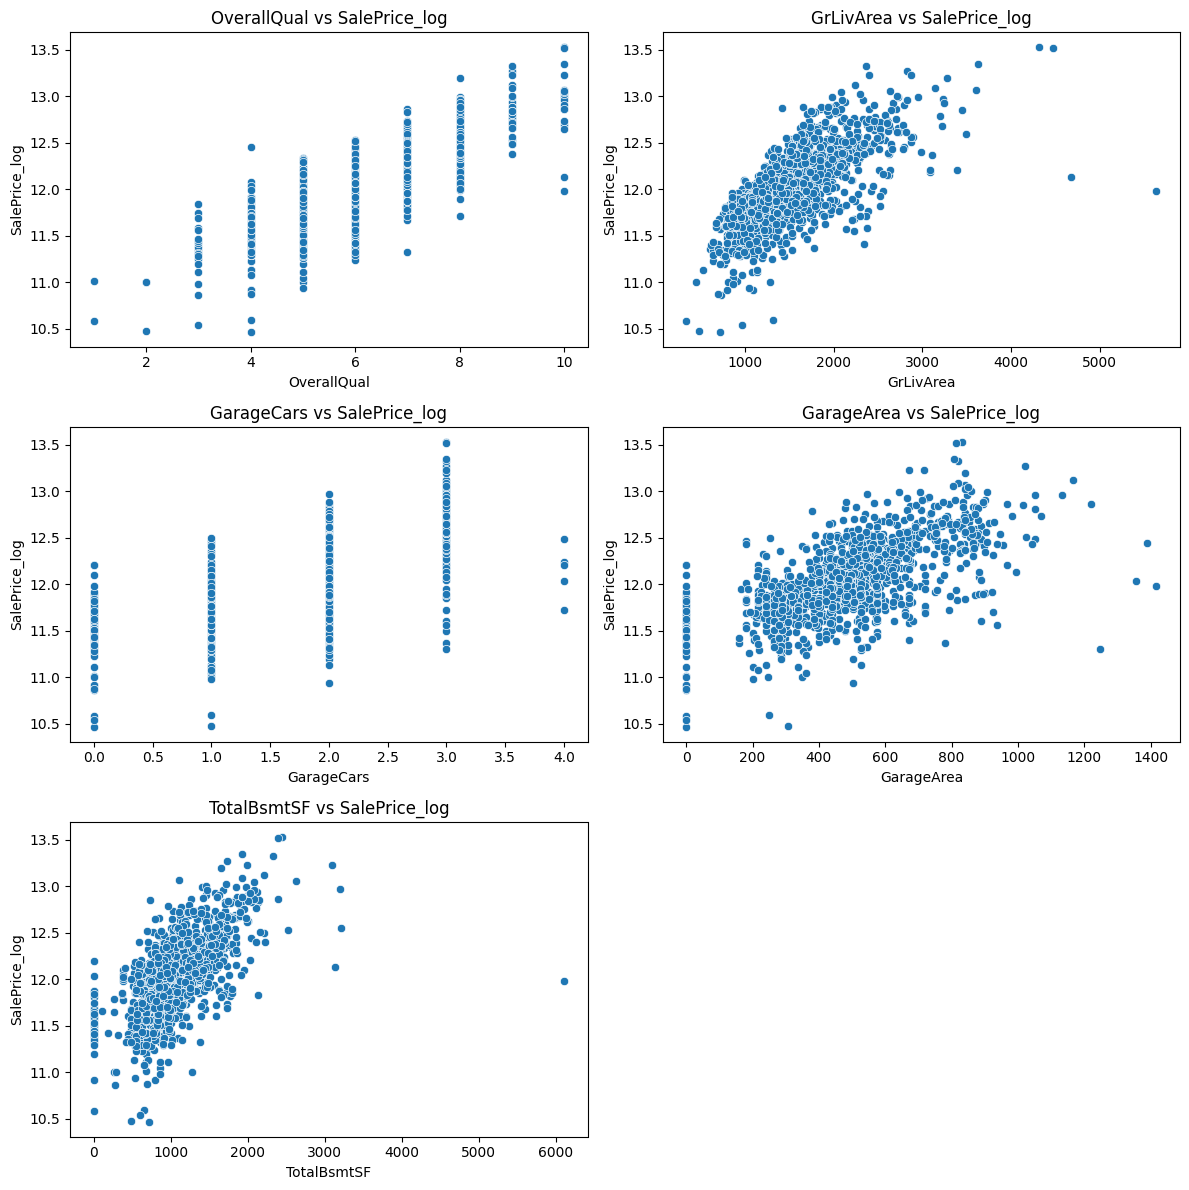

In [20]:
n_cols = 2
n_rows = (len(top_corr) + n_cols -1) //n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize =(12, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(top_corr):
    sns.scatterplot(x=data[col], y=data['SalePrice_log'], ax=axes[i])
    axes[i].set_title(f'{col} vs SalePrice_log')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('SalePrice_log')

# Supprimer les axes vides s'il y en a
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show() 

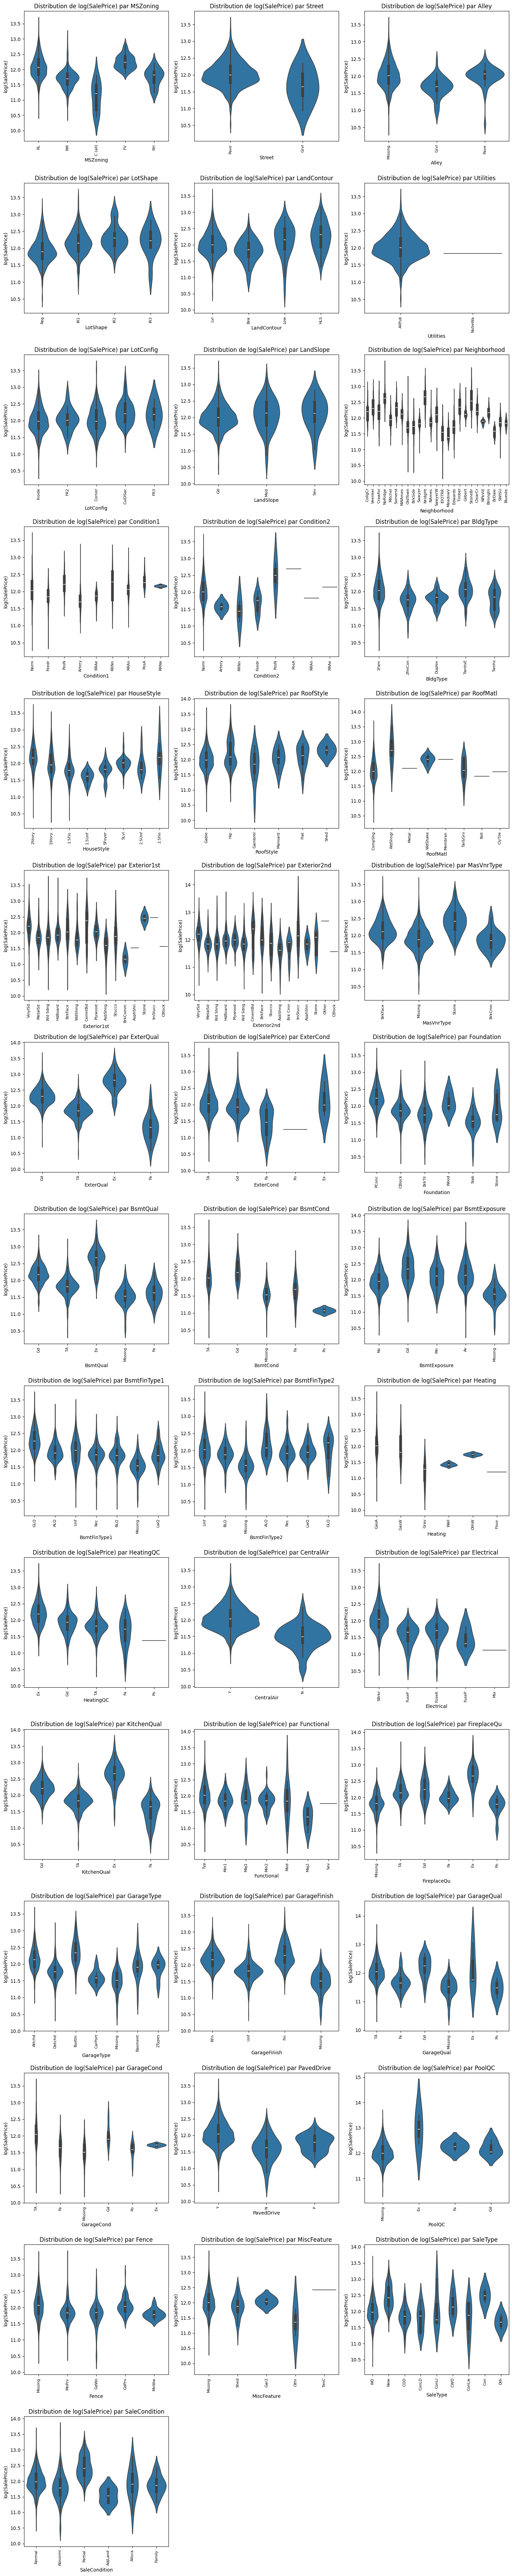

In [21]:
n_cols = 3
n_rows = (len(categoricals_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*5))
axes = axes.flatten()

for i, col in enumerate(categoricals_cols):
    sns.violinplot(x=col, y="SalePrice_log", data=data, ax=axes[i], inner="box")
    axes[i].set_title(f"Distribution de log(SalePrice) par {col}")
    axes[i].set_ylabel("log(SalePrice)")
    axes[i].tick_params(axis='x', rotation=90, labelsize=8)

# Supprimer les axes vides restants
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




In [22]:
data_encoded = pd.get_dummies(data, columns=categoricals_cols, drop_first=True)

In [23]:
X = data_encoded.drop(['SalePrice', 'SalePrice_log'], axis= 1)
y = data_encoded['SalePrice_log']

In [24]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state= 42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)